<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
sns.set_style()


%matplotlib inline
%config InLineBackend.figure_format = 'svg' #melhora a plotagem dos gráficos

#Bibliotecas de dados
!pip install yfinance
import yfinance as yf
yf.pdr_override()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install plotly
import plotly.express as px

In [3]:
#Importar os dados do yahoo finance
df = wb.get_data_yahoo("^BVSP", pd.datetime(2020, 1,1), period = "max", interval = '1d')[['Adj Close']]

df.head()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Adj Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


In [4]:
#Resetar o index
df.reset_index(inplace = True)
df

,Date,Adj Close
0,2020-01-02,118573.000000
1,2020-01-03,117707.000000
2,2020-01-06,116878.000000
3,2020-01-07,116662.000000
4,2020-01-08,116247.000000
...,...,...
498,2022-01-06,101561.000000
499,2022-01-07,102476.000000
500,2022-01-10,101945.000000
501,2022-01-11,103645.000000


In [5]:
#Transformar a coluna Date em datetime, transformar em índice e retirar a coluna Date
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-d%')
df.set_index(df.Date, inplace = True)
df.drop(columns = 'Date', inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Adj Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


In [6]:
px.line(df, y=df['Adj Close'], x=df.index)


In [7]:
#Plotar os dados de df
#fig, ax = plt.subplots(figsize = (10,5));


##ax.plot(df, color = "blue")
#ax.set_xlabel('Date')
#ax.set_ylabel('Price')
#
##criar uma legenda
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='blue', label='INDFUT')
#ax.legend(handles=[red_patch],loc = 'best')

#plt.tight_layout();


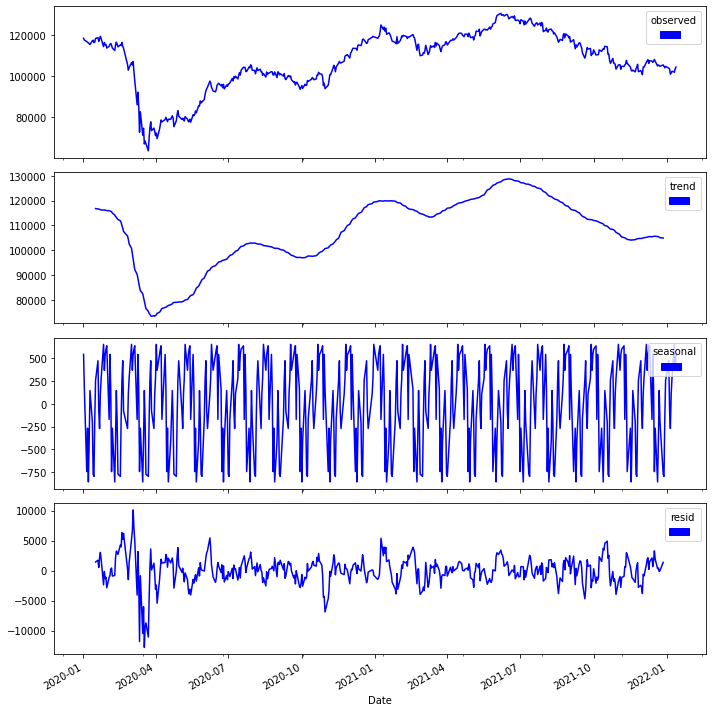

In [8]:
#Decompor a TimeSeries
result = seasonal_decompose(df, freq = 23)

#plotar
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10,10), sharex = True)
result.observed.plot(ax=ax1, color = "blue")
result.trend.plot(ax=ax2,  color = "blue")
result.seasonal.plot(ax=ax3,  color = "blue")
result.resid.plot(ax=ax4,  color = "blue")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue')
ax1.legend(handles=[blue_patch],loc = 'best', title = 'observed')
ax2.legend(handles=[blue_patch],loc = 'best', title = 'trend')
ax3.legend(handles=[blue_patch],loc = 'upper right', title = 'seasonal')
ax4.legend(handles=[blue_patch],loc = 'best', title = 'resid')

plt.tight_layout();



In [9]:
#Naive approuch
#Dividir os dados 
 
train = df[df.index <= '2021-01-01']
test = df[df.index > '2021-01-01']

#Criar um DateFrame para armazenar as previsões

valid = test.copy()

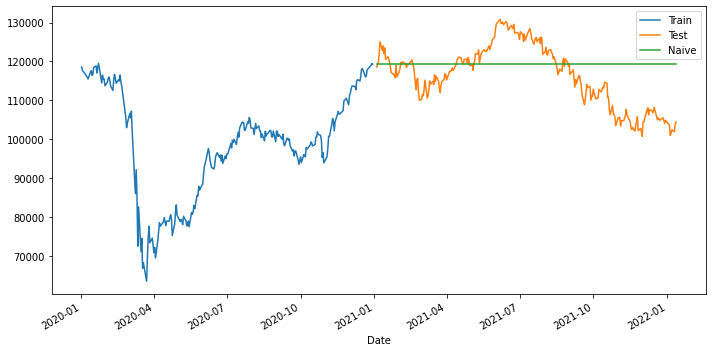

In [10]:
#Copiar o último valor do dataser

valid['naive'] = train.iloc[-1].values[0]

#Plotar train e test

fig, ax = plt.subplots(figsize = (10,5))
train.plot(ax=ax)
test.plot(ax=ax)
valid['naive'].plot(ax=ax)
ax.legend(['Train', 'Test', 'Naive'])
plt.tight_layout();

In [11]:
#Importar a biblioteca sckiti learn
from sklearn.metrics import mean_squared_error

In [12]:
#Calculo do erro da Previsão RMSE

print('Erro do Método Naive Method')
mean_squared_error(valid['Adj Close'], valid['naive'], squared = True)

Erro do Método Naive Method


69862005.49998564

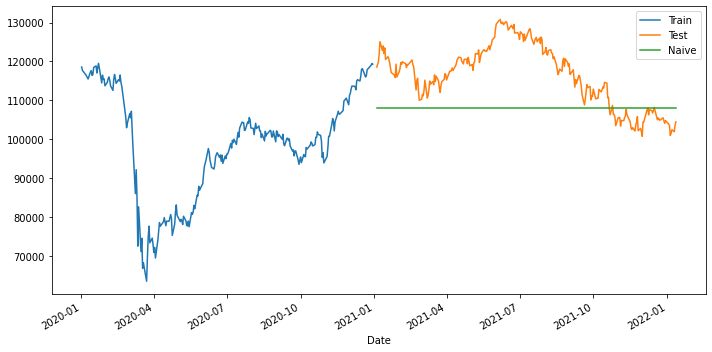

In [13]:
#Média móvel

valid['m50'] = train['Adj Close'].rolling(50).mean().iloc[-1]

#Plotar train e test

fig, ax = plt.subplots(figsize = (10,5))
train.plot(ax=ax)
test.plot(ax=ax)
valid['m50'].plot(ax=ax)
ax.legend(['Train', 'Test', 'Naive'])

plt.tight_layout();



In [14]:
#Calcular erro da previsão 
print('Erro da Média de 50 dias')
mean_squared_error(valid['Adj Close'], valid['m50'], squared = True)

Erro da Média de 50 dias


133146410.88162091

In [31]:
#Hot''s Linear Trend Model
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

valid['holt'] = Holt(train['Adj Close']).fit(smoothing_level = 100,
                                            smoothing_slope = 100,).forecast(len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:900: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:903: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



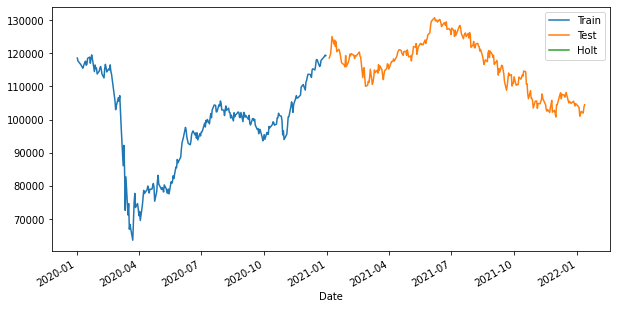

In [24]:
#Plotar train e test
#Não consegui plotar reassistir a aula 

fig, ax = plt.subplots( figsize = (10,5))
train.plot(ax=ax)
test.plot(ax=ax)
valid['holt'].plot(ax=ax)
ax.legend(['Train', 'Test', 'Holt'])

plt.show();

In [17]:

#Criando novas features
#df['Date'] = df.index
#df['Year'] = df.Date.dt.year
#df['Month'] = df.Date.dt.month
#df['Week'] = df.Date.dt.week
#df.drop(columns = 'Date', inplace = True)
#df